<a href="https://colab.research.google.com/github/eunzzae/Study_DS/blob/main/03)_%EA%B8%B0%EC%83%81_%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%99%9C%EC%9A%A9_%EC%A0%84%EB%A0%A5_%EB%B0%9C%EC%A0%84%EB%9F%89_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기상 데이터 활용 전력 발전량 예측  
> **목차(Context)**

* 문제상황 및 데이터 살펴보기  
* 문제해결 프로세스 정의  
1) 전력 발전량 Peak 시간대 탐색  
2) 전력 발전량과 기상 데이터 상관관계 분석  
3) ML 활용 전력 발전량 예측

In [1]:
# Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# Google drive 마운트
from google.colab import drive
drive.mount('/content/drive')

# # ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
# import os
# os.chdir('/content/drive/MyDrive/Colab Notebooks/part3_lecture_fastcampus/chapter03')
# # '/content/drive/MyDrive/Colab Notebooks/ ← 여기 경로까지는 본인의 경로 입력, part3_lecture_fastcampus/chapter03' ← 변경X
# os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 문제상황 및 데이터 살펴보기
---
> **시나리오**
```
 A사는 내년도 전력사용계획을 예측하여 차년도 전력 예산안을 작성하려고 한다.  
 전력 발전량은 기상 날씨에 따라 변동이 심하기 때문에 전력 예산 수립에 어려움을
 겪고 있다. 2017년 1년치에 대한 데이터를 활용하여 전력발전량을 예측하는 모델을
 만들고 일기예보에 데이터를 활용하여 전력발전량을 예측 및 전력사용계획을
 세우고자 한다.
```

> **데이터 살펴보기**
* 2017.1.1 ~ 2017.12.30일까지 10분 단위로 기상 데이터 및 전력 발산량과 각 위치(Zone1~3)의 발전량이 기록되어 있다.
* 데이터 명세

|Date|Temperature|Humidity|Wind Speed|general diffuse flows|diffuse flows|Zone 1 Power Consumption|Zone 2 Power Consumption|Zone 3 Power Consumption|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|날짜|온도|습도|풍속|전력 발산량(일반)|전력 발산량|Zone1 발전량|Zone2 발전량|Zone3 발전량|

In [3]:
# Data read
import pandas as pd
bath = '/content/drive/MyDrive/[STUDY] 데이터사이언스/데이터분석/data/chapter03_기상 데이터 활용 전력 발전량 예측/'
df = pd.read_csv(bath + 'chapter03_powercomp.csv')
df.head(10)

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
5,1/1/2017 0:50,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048
6,1/1/2017 1:00,5.641,77.7,0.080,0.048,0.096,25998.98734,16993.31307,17945.06024
7,1/1/2017 1:10,5.496,78.2,0.085,0.055,0.093,25446.07595,16661.39818,17459.27711
8,1/1/2017 1:20,5.678,78.1,0.081,0.066,0.141,24777.72152,16227.35562,17025.54217
9,1/1/2017 1:30,5.491,77.3,0.082,0.062,0.111,24279.49367,15939.20973,16794.21687


# 문제해결 프로세스 정의
---
> **문제정의**
```
전력예산수립 어려움, 난항
```

> **기대효과**
```
전력예산 수립을 통한 예산 확보 및 정상 운영
```

> **해결방안**
```
- 전력 예측 모델을 통한 전력사용 예측 및 전력계획 수립  
- Session 1
- 시계열 데이터 탐색 및 발전량 Peak 시간대 탐색
- Session 2
- 다양한 Plot을 활용한 데이터 상관관계 분석
- Session 3
- ML 알고리즘을 활용한 전력 발전량 예측
```

> **성과측정**
```
전력예측 모델을 활용하여 전력예산 수립으로 인한 운영 비용 절감
```

> **현업적용**
```
- 일기예보 기상 데이터 실시간 수집 체계 구축
- 발전량 센서 Data 실시간 Server 전송 체계 구축
- 일정 주기 간격으로 기상 데이터 인입 및 모델을 통해 발전량 예측 데이터 생성
- 생성된 데이터에 따라 전력 계획안 수립
```


## Session 1
## **전력 발전량 Peak 시간대 탐색**
---

### Data 전처리
---
* 수집된 데이터의 기본 정보들을 확인  
(1) Data shape(형태) 확인  
(2) Data type 확인  
(3) Null 값 확인  
(4) Outlier 확인

In [5]:
# Data 형태 확인
# 52416 row, 9 col로 구성됨
print('df', df.shape)

df (52416, 9)


In [6]:
# Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [8]:
# Null 값 확인
print(df.isnull().sum())

DateTime                     0
Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64


In [9]:
# Outlier 확인, 음수값 확인
df.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [11]:
# Date type 변경
import datetime
df['DateTime'] =pd.to_datetime(df['DateTime'])

In [12]:
# 전처리 완료
df.head(5)

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


### 전력량 Data 탐색
---
* Data Trend 분석

In [13]:
# 2017년 1년치 Data 확인
df['DateTime'].min(), df['DateTime'].max()

(Timestamp('2017-01-01 00:00:00'), Timestamp('2017-12-30 23:50:00'))

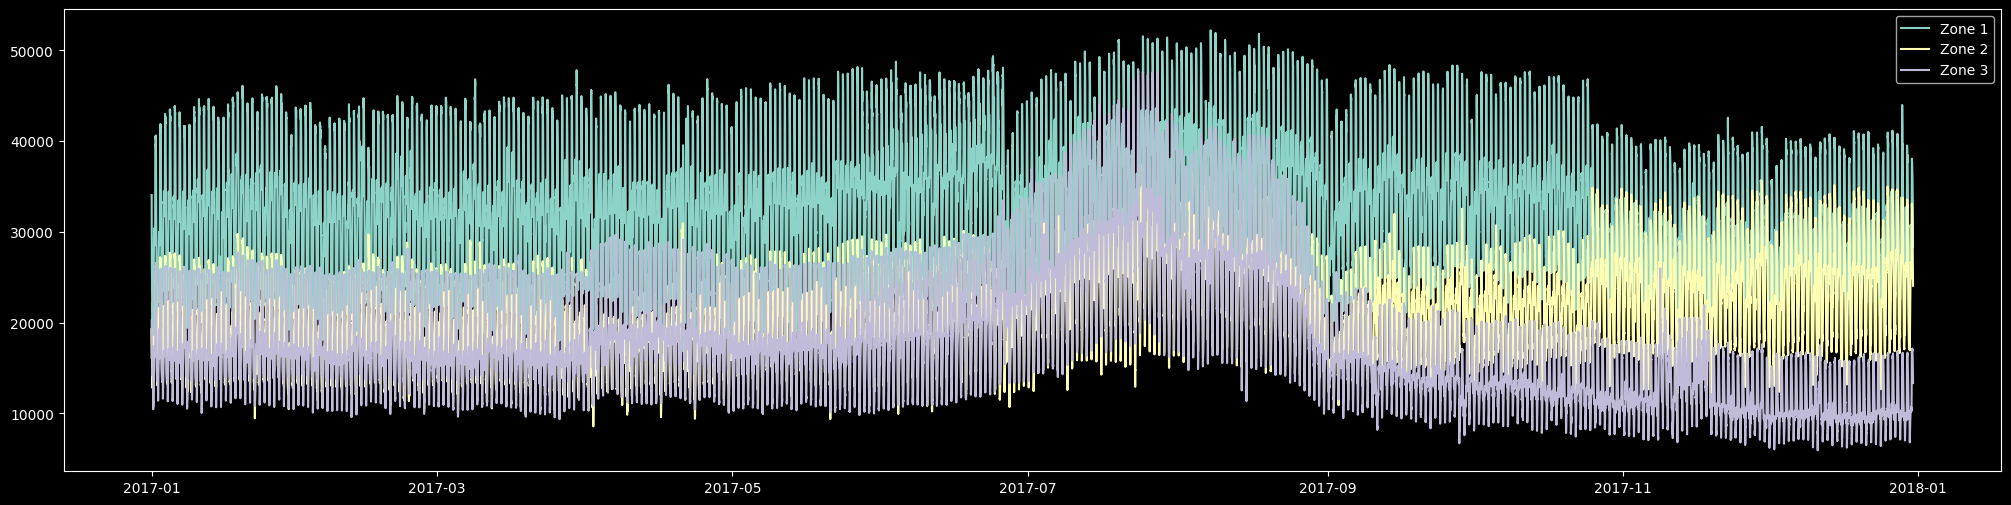

In [17]:
# Zone1, 2, 3 전력 발전량 확인
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

plt.plot(df['DateTime'], df['Zone 1 Power Consumption'], label='Zone 1')
plt.plot(df['DateTime'], df['Zone 2  Power Consumption'], label='Zone 2')
plt.plot(df['DateTime'], df['Zone 3  Power Consumption'], label='Zone 3')
plt.legend()
plt.gcf().set_size_inches(25, 6)

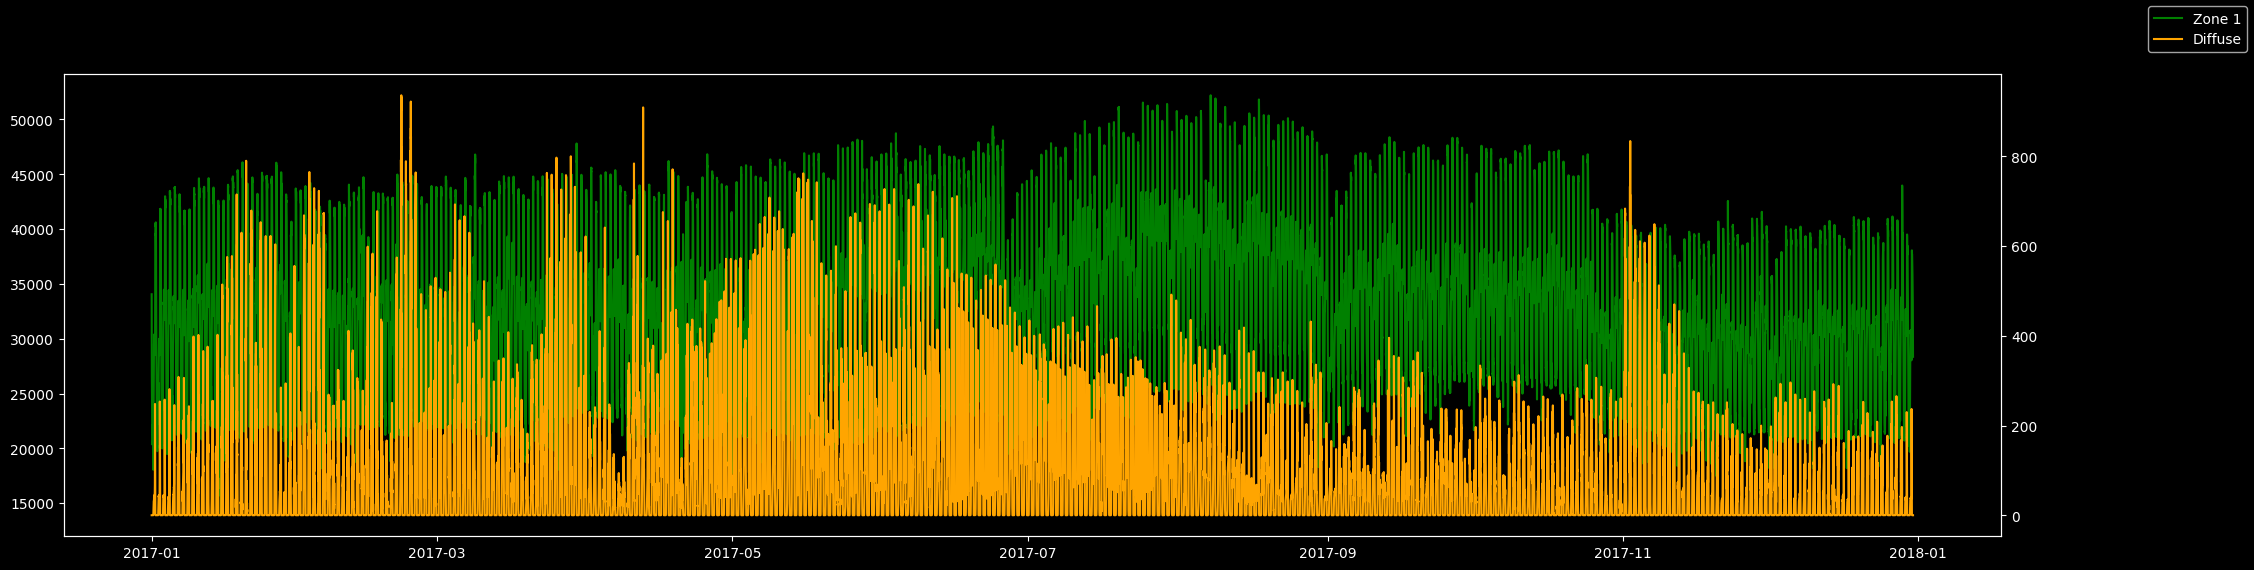

In [18]:
# Zone1 발전량과 전력 발산량 비교
# 전력 발산량이 낮아질 때 전력 발전량이 증가하는 경향을 보임
fig, ax1 = plt.subplots()
ax1.plot(df['DateTime'], df['Zone 1 Power Consumption'], color='green', label='Zone 1')

ax2 = ax1.twinx()
ax2.plot(df['DateTime'], df['diffuse flows'], color='orange', label='Diffuse')

fig.legend()
plt.gcf().set_size_inches(25, 6)
plt.show()

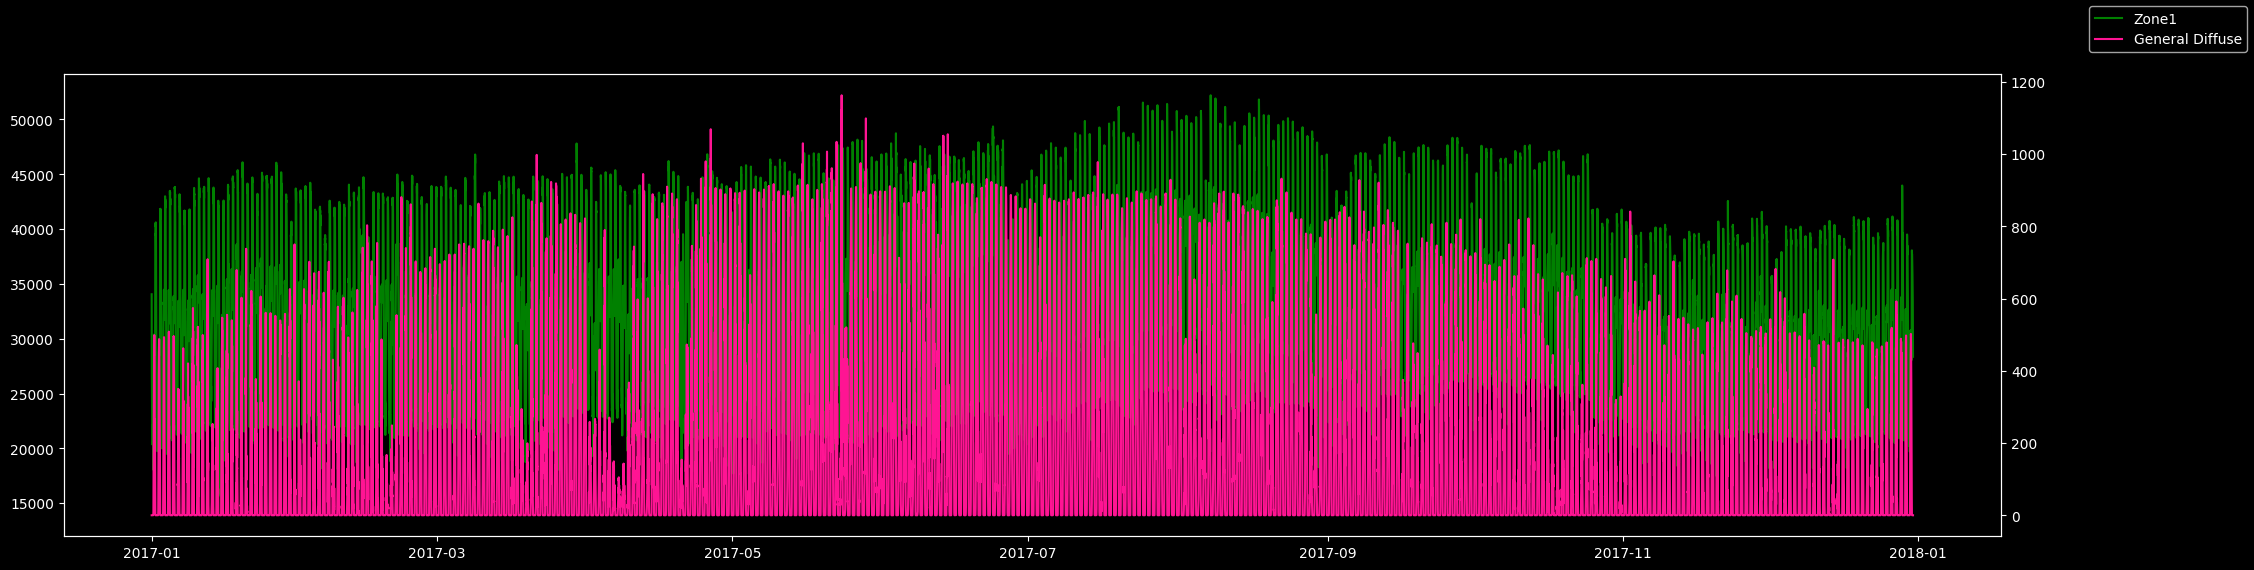

In [20]:
# Zone1 발전량과 전력 발산량 일반 비교
# 전력 발산량 일반과는 큰 상관관계는 없어보임
fig, ax1 = plt.subplots()
ax1.plot(df['DateTime'], df['Zone 1 Power Consumption'], color='green', label='Zone1')

ax2=ax1.twinx()
ax2.plot(df['DateTime'], df['general diffuse flows'], color='deeppink', label='General Diffuse')

fig.legend()
plt.gcf().set_size_inches(25, 6)
plt.show()

### Peak 시간대 탐색
---
* 전력 발전량 Peak 월 탐색  
* 전력발전량 Peak 시간대 탐색

In [22]:
# 시간 데이터 활용 Month 생성
df['month'] = df['DateTime'].dt.month
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,month
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,1
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,1
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,1
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,1
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,1


In [23]:
# COL명 변경
df.columns=['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'zone1',
       'zone2', 'zone3', 'month']

# 순서변경
df=df[['DateTime',  'month', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'zone1',
       'zone2', 'zone3']]

In [24]:
df.head()

,DateTime,month,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,zone1,zone2,zone3
0,2017-01-01 00:00:00,1,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,1,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,1,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,1,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [26]:
# zone1은 8월에 가장 평균 발전량이 많음
df['zone1'].groupby(df['month']).mean().sort_values(ascending=False).head()

month
8     36435.189574
7     35831.553603
6     34605.540839
9     33396.681416
10    32827.660055
Name: zone1, dtype: float64

In [28]:
#zone2는 8월에 가장 평균 발전량이 많음
df['zone2'].groupby(df['month']).mean().sort_values(ascending=False).head()

month
8     24656.216575
7     24147.886893
12    23681.852818
11    23240.464015
10    21468.993441
Name: zone2, dtype: float64

In [29]:
# zone3는 7월에 가장 평균 발전량이 많음
df['zone3'].groupby(df['month']).mean().sort_values(ascending=False).head()

month
7    28194.111216
8    24648.894732
6    20430.941538
4    18593.167677
1    17746.095349
Name: zone3, dtype: float64

In [30]:
# 시간 데이터 활용 hour col 생성
df['hour']=df['DateTime'].dt.hour

In [31]:
# zone1은 20h가 가장 평균 발전량이 많음
df['zone1'].groupby(df['hour']).mean().sort_values(ascending=False).head()

hour
20    43822.590575
19    42795.919144
21    42216.478542
22    39068.635850
18    38846.130578
Name: zone1, dtype: float64

In [33]:
# zone2는 20h가 가장 평균 발전량이 많음
df['zone2'].groupby(df['hour']).mean().sort_values(ascending=False).head()

hour
20    28186.910385
19    27723.744582
21    27228.712785
18    25443.902236
22    25284.942543
Name: zone2, dtype: float64

In [35]:
# zone3는 20h가 가장 평균 발전량이 많음
df['zone3'].groupby(df['hour']).mean().sort_values(ascending=False).head()

hour
20    26027.609150
21    25186.686692
19    25125.471392
22    23529.045275
18    21850.768343
Name: zone3, dtype: float64

In [37]:
# 8월달 1일 sample data plotting
df_8 = df[df['DateTime'].astype(str).str.contains('2017-08-01')]

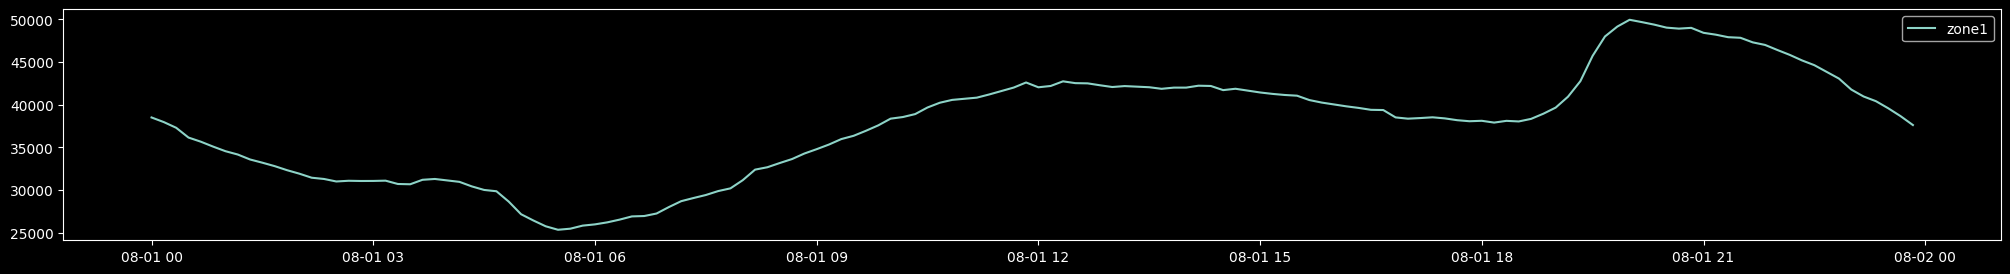

In [39]:
# 신기하게 저녁 시간에 발전량이 많음
plt.plot(df_8['DateTime'], df_8['zone1'], label='zone1')
plt.legend()
plt.gcf().set_size_inches(25, 3)

## Session 2
## **전력 발전량과 기상 데이터 상관관계 분석**
---

### Line plot - 상관관계 분석
---
* 전력 발전량과 기상데이터를 Plotting 후 관계 파악

In [40]:
df.head()

,DateTime,month,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,zone1,zone2,zone3,hour
0,2017-01-01 00:00:00,1,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0
1,2017-01-01 00:10:00,1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0
2,2017-01-01 00:20:00,1,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0
3,2017-01-01 00:30:00,1,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0
4,2017-01-01 00:40:00,1,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,0


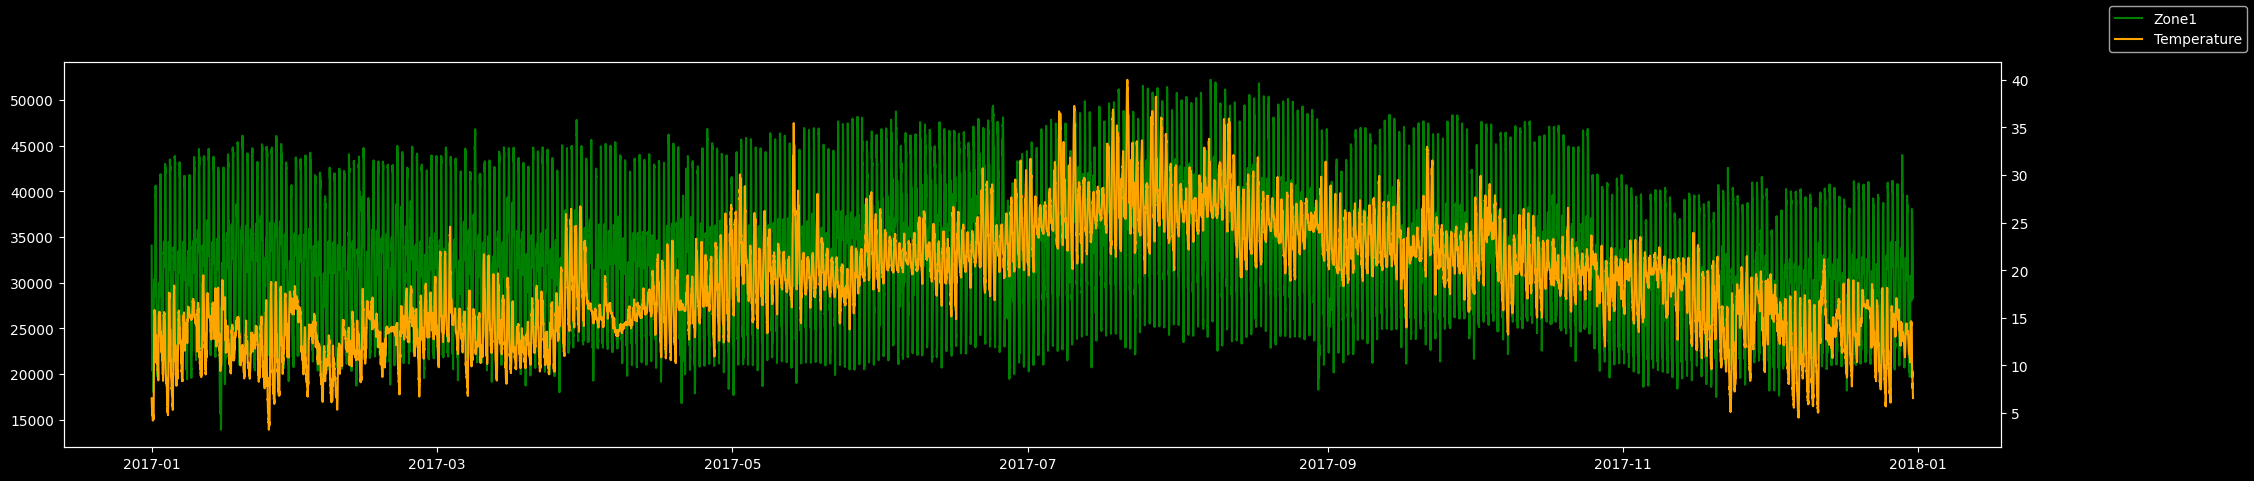

In [41]:
# twin plot(이중 축 차트)
# 온도가 증가할수록 발전량도 증가하는 경향을 보임
fig, ax1 = plt.subplots()
ax1.plot(df['DateTime'], df['zone1'], color='green', label='Zone1')

ax2 = ax1.twinx()
ax2.plot(df['DateTime'], df['Temperature'], color='orange', label='Temperature')

fig.legend()
plt.gcf().set_size_inches(25, 5)

### Scatter plot 상관관계 분석

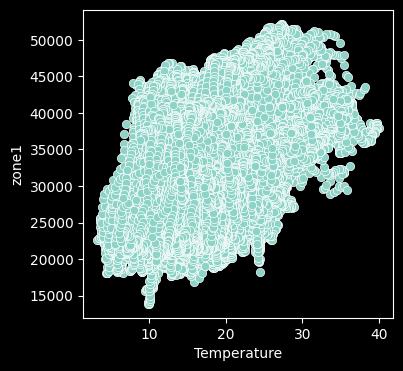

In [43]:
# Scatter plot
# 온도가 증가할수록 발전량도 증가하는 경향을 보임
sns.scatterplot(x=df['Temperature'], y=df['zone1'])
plt.gcf().set_size_inches(4,4)

In [45]:
# 상관계수 확인
import scipy.stats as stats
stats.pearsonr(df['Temperature'], y=df['zone1'])

PearsonRResult(statistic=0.44022078902914086, pvalue=0.0)

### Pair plot - 상관관계 분석
---


In [46]:
df.columns

Index(['DateTime', 'month', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'zone1', 'zone2', 'zone3',
       'hour'],
      dtype='object')

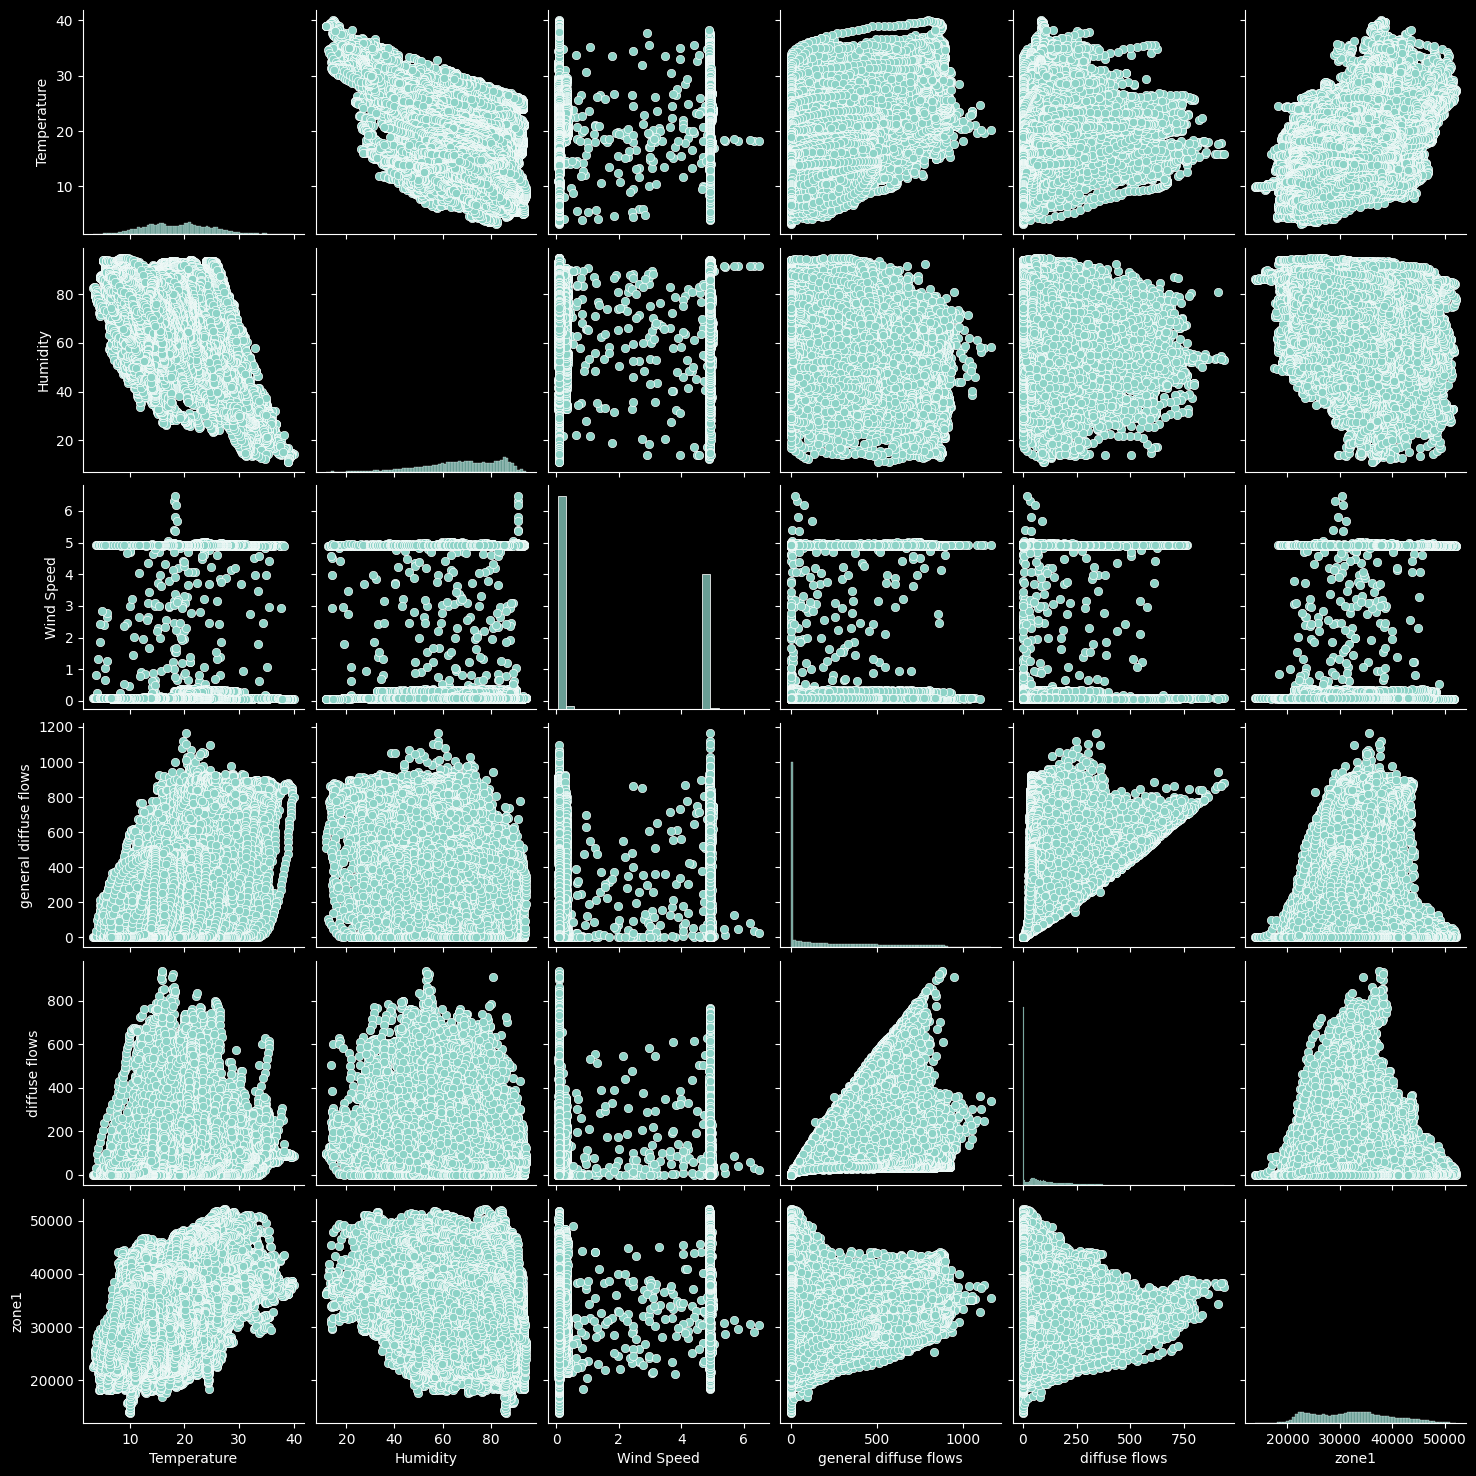

In [47]:
# 모든 변수 조합에 관한 Scatter plot
df_pair=df[['Temperature', 'Humidity', 'Wind Speed','general diffuse flows', 'diffuse flows', 'zone1']]
sns.pairplot(df_pair)
plt.show()

### Heat map - 상관관계 분석
---

In [48]:
df_pair.corr()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,zone1
Temperature,1.000000,-0.460243,0.477109,0.460294,0.196522,0.440221
Humidity,-0.460243,1.000000,-0.135853,-0.468138,-0.256886,-0.287421
Wind Speed,0.477109,-0.135853,1.000000,0.133733,-0.000972,0.167444
general diffuse flows,0.460294,-0.468138,0.133733,1.000000,0.564718,0.187965
diffuse flows,0.196522,-0.256886,-0.000972,0.564718,1.000000,0.080274
zone1,0.440221,-0.287421,0.167444,0.187965,0.080274,1.000000


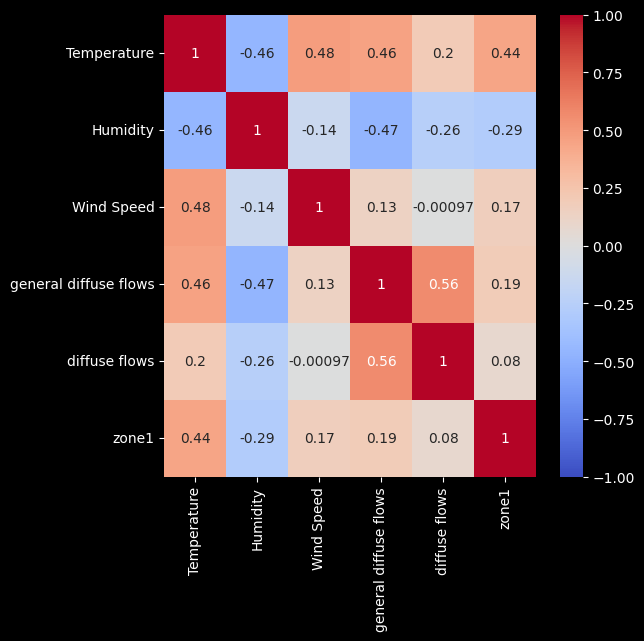

In [54]:
# 변수의 보든 조합, 상관계수로 표현
plt.gcf().set_size_inches(6,6)
sns.heatmap(df_pair.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm');

## Session 3
## **ML 활용 전력 발전량 예측**
---

### 모델링을 위한 데이터 준비
---
* 모델링을 수행하기 위해 Feature와 예측하고자하는 값인 Y로 데이터를 분리  
* 학습과 예측을 위한 Train/Test set 분할

In [55]:
df.head()

,DateTime,month,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,zone1,zone2,zone3,hour
0,2017-01-01 00:00:00,1,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0
1,2017-01-01 00:10:00,1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0
2,2017-01-01 00:20:00,1,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0
3,2017-01-01 00:30:00,1,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0
4,2017-01-01 00:40:00,1,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,0


In [56]:
df.columns

Index(['DateTime', 'month', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'zone1', 'zone2', 'zone3',
       'hour'],
      dtype='object')

In [58]:
# col 위치 변경
df = df[['DateTime', 'month', 'hour','Temperature', 'Humidity', 'Wind Speed',
    'general diffuse flows', 'diffuse flows', 'zone1', 'zone2', 'zone3']]

In [59]:
# 모델링을 학습하기 위한 Feature(X)와 Y 데이터를 구분
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

X = df.drop(['DateTime','zone1','zone2','zone3'], axis=1)
Y=df['zone1']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(36691, 7)
(36691,)
(15725, 7)
(15725,)


### 모델 학습 및 평가
---
* 모델을 학습하고 예측을 수행하여 성능을 평가

In [60]:
# RandomForestRegressor 모델 학습
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [62]:
# 예측
# 예측은 학습에 사용된 Data와 Test Data 모두 예측하고 평가함
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('r2_train(r2): ', r2_train)
print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_train(mae):  338.6880595181594
r2_train(r2):  0.9951937025154091

mae_test(mae):  909.4052361239045
r2_score(r2):  0.9654915617476768


In [64]:
# 실제 값과 예측 값에 대해 표현
df_result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_test}).reset_index(drop=True)
df_result['diff'] = df_result['Real Values'] - df_result['Predicted Values']
df_result.head()

,Real Values,Predicted Values,diff
0,47505.61598,47136.036742,369.579238
1,31683.65019,30632.376487,1051.273703
2,37001.32450,36283.843272,717.481228
3,47042.12389,45760.871629,1281.252261
4,33501.53846,32797.048728,704.489732


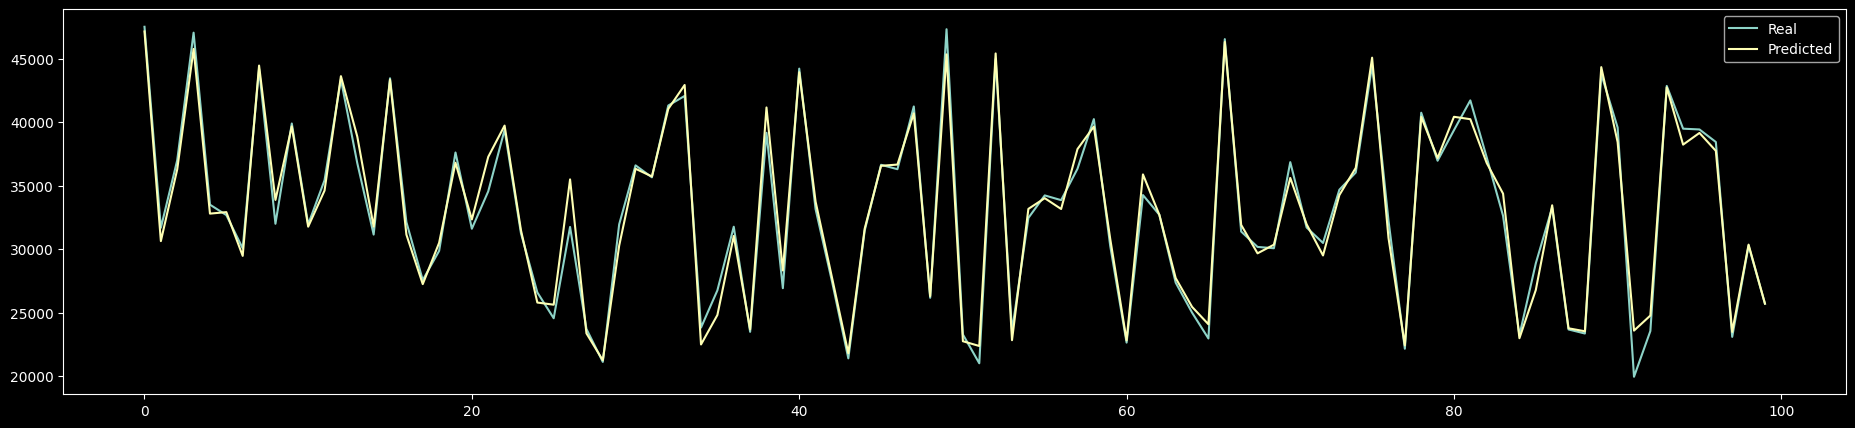

In [66]:
# Zone1 발전량 Real과 Pred 값 확인
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

plt.plot(df_result.index[0:100], df_result['Real Values'][0:100], label='Real')
plt.plot(df_result.index[0:100], df_result['Predicted Values'][0:100], label='Predicted')
plt.legend()
plt.gcf().set_size_inches(23,5)


### 중요 변수 파악
---
* Feature IMP 분석을 통한 중요변수 파악


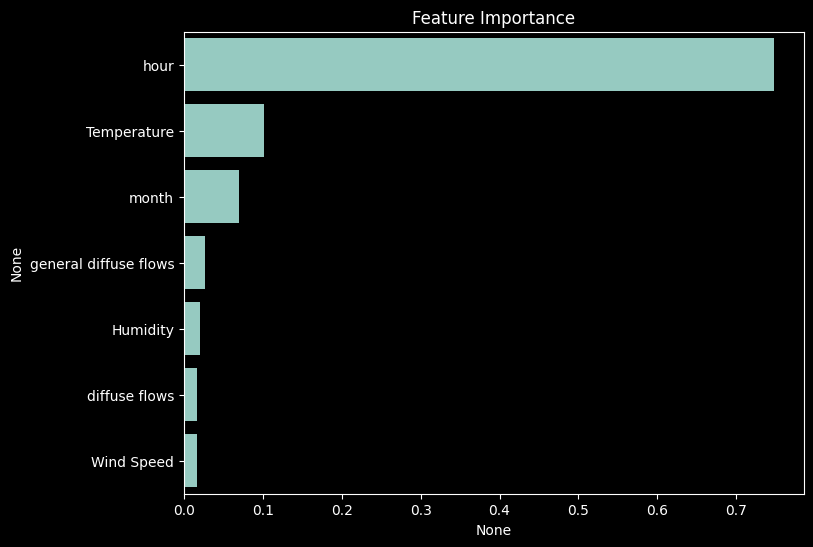

In [68]:
ftr_importances_values = rfr.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importance')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

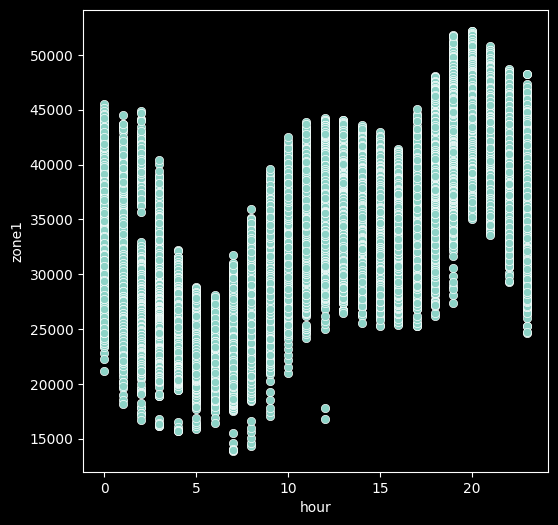

In [70]:
# 가장 Feature IMP가 높은 데이터에 대해 전력 발전량과의 관계를 Ploting
sns.scatterplot(x=df['hour'], y=df['zone1'])
plt.gcf().set_size_inches(6,6)